## Breast Cancer prediction
---------
![](image.jpeg)


### DATA OVERVIEW

In [33]:

# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [34]:
df=pd.read_csv('data.csv')

In [35]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
df.shape

(569, 33)

In [37]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [38]:
# return all the columns with null values count

df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [39]:

# remove the null value column

df=df.dropna(axis=1)

In [40]:
df.shape

(569, 32)

In [41]:

# describe the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [42]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Benign (0) vs Malignant (1) Tumors')

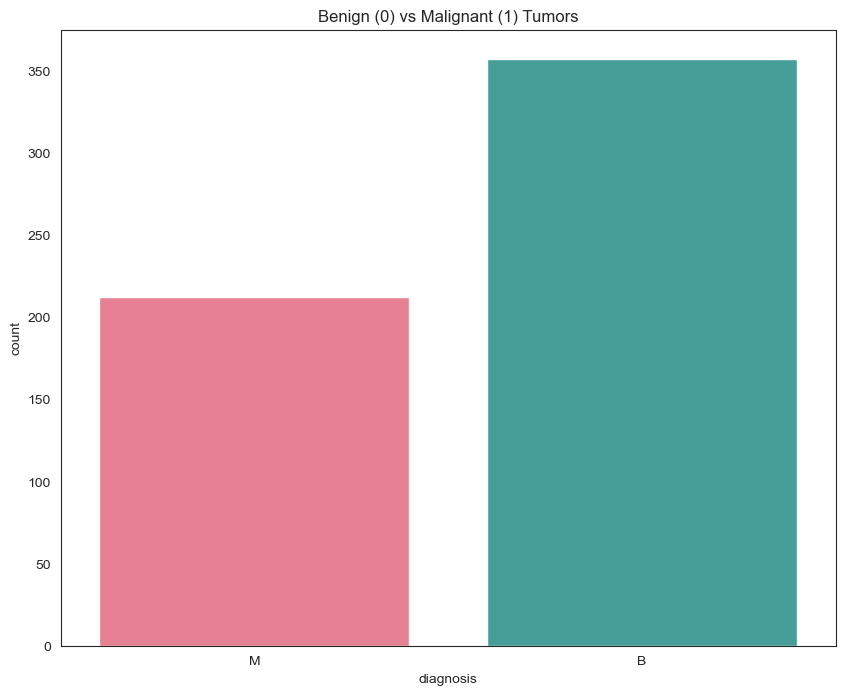

In [43]:
ax = sns.countplot(data=df, x='diagnosis',palette='husl')

plt.title('Benign (0) vs Malignant (1) Tumors')

In [44]:
# label encoding(convert the value of M and B into 1 and 0)
# One Hot Encoding of the Categorical Data Values

from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

C:\Users\Priya\AppData\Local\Temp\ipykernel_15460\2458900488.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)


In [45]:
df.head()
     

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory Data Analysis


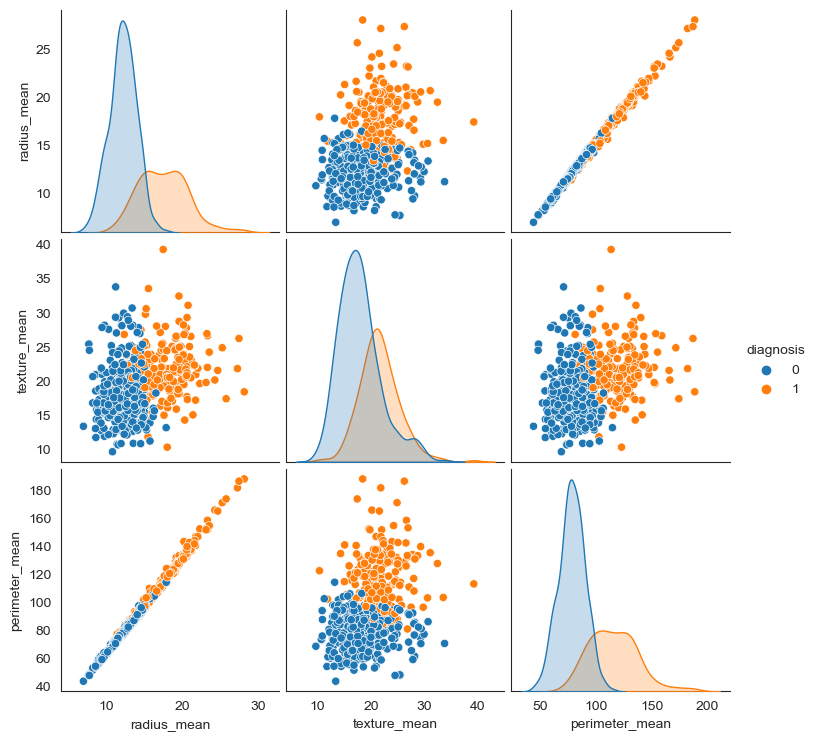

In [46]:
sns.pairplot(df.iloc[:,1:5],hue="diagnosis")

In [47]:
diag_gr = df.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
0,357
1,212


<Axes: >

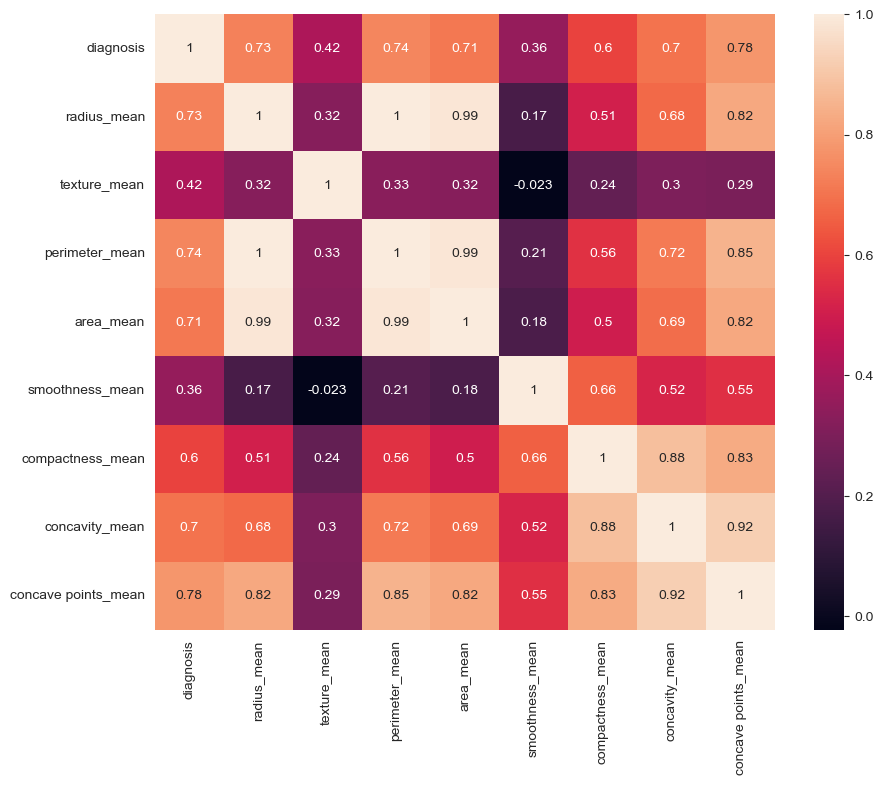

In [48]:
sns.heatmap(df.iloc[:, 1:10].corr(), annot=True)

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Feature Scaling and Model Building

In [50]:
# split the dataset into dependent(X) and Independent(Y) datasets

X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values

In [51]:
# spliting the data into 80% training and 20% test dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)
     

# feature scaling

from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)
     

In [52]:

# models/ Algorithms

def models(X_train,Y_train):

        # Logistic Regression
        from sklearn.linear_model import LogisticRegression
        log=LogisticRegression(random_state=0)
        log.fit(X_train,Y_train)


        # Decision Tree
        from sklearn.tree import DecisionTreeClassifier
        tree=DecisionTreeClassifier(random_state=0,criterion="entropy")
        tree.fit(X_train,Y_train)

        # Random Forest
        from sklearn.ensemble import RandomForestClassifier
        forest=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
        forest.fit(X_train,Y_train)

        # K-NN
        from sklearn.neighbors import KNeighborsClassifier
        classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
        classifier.fit(X_train, Y_train)

        # Support Vector Machines
        from sklearn.svm import SVC
        svm = SVC(gamma='auto')
        svm.fit(X_train, Y_train)

        print('1) Logistic Regression Accuracy:',log.score(X_train,Y_train) * 100, "%")
        print('2) Decision Tree Accuracy:',tree.score(X_train,Y_train) * 100,"%")
        print('3) Random Forest Accuracy:',forest.score(X_train,Y_train) * 100,"%")
        print('4) KNN Accuracy:',classifier.score(X_train,Y_train) * 100, "%")
        print('5) SVM Accuracy:',svm.score(X_train,Y_train) * 100,"%")

        return log,tree,forest,classifier,svm

In [53]:
model=models(X_train,Y_train)

1) Logistic Regression Accuracy: 99.12087912087912 %
2) Decision Tree Accuracy: 100.0 %
3) Random Forest Accuracy: 99.78021978021978 %
4) KNN Accuracy: 98.02197802197801 %
5) SVM Accuracy: 98.46153846153847 %


In [54]:
# testing the models/result

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for i in range(len(model)):
    print("Model",i)
    print(classification_report(Y_test,model[i].predict(X_test)))
    print('Accuracy : ',accuracy_score(Y_test,model[i].predict(X_test)) * 100,"%")
    print()

Model 0
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy :  96.49122807017544 %

Model 1
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

Accuracy :  93.85964912280701 %

Model 2
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97     

### Training with Logistic Regression

In [62]:
# Using GridSearchCV to find the best parameters

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_regression_model_2 = LogisticRegression(max_iter=2000)


# setting different parameter combinations
parameters = [{'C': np.logspace(-5,8,15),
               'penalty': ['l1', 'l2']}]
# n_jobs=-1 uses all the system's processors
grid_search = GridSearchCV(estimator=logistic_regression_model_2,
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, Y_train)
# get the best accuracy score
best_f1 = grid_search.best_score_
# get the parameters that gave the best score
best_parameters = grid_search.best_params_
print("Best f1 {:.2f} %".format(best_f1*100))
print("Best Parameters:", best_parameters)

Best f1 98.13 %
Best Parameters: {'C': 0.4393970560760795, 'penalty': 'l2'}


C:\Users\Priya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Priya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Priya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Priya\anaconda3\Lib\site-packages\sklearn\linear_model\_l

### Training with KNN

In [64]:
# Use GridSearchCV to find the best parameters
from sklearn.neighbors import KNeighborsClassifier

knn_model_2 = KNeighborsClassifier()

# setting different parameter combinations
parameters = [{'n_neighbors':np.arange(1,15),
               'metric':['minkowski'],
               'p':np.arange(1,4)}
              ]
# n_jobs=-1 uses all the system's processors
grid_search = GridSearchCV(estimator=knn_model_2,
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, Y_train)
# get the best accuracy score
best_f1 = grid_search.best_score_
# get the parameters that gave the best score
best_parameters = grid_search.best_params_
print("Best F1 score {:.2f} %".format(best_f1*100))
print("Best Parameters:", best_parameters)
     

Best F1 score 95.90 %
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 4, 'p': 1}


### Training with SVM

In [65]:
from sklearn.svm import SVC
svm_model_2 = SVC()


# setting different parameter combinations
parameters = [{'C':np.logspace(-5,8,15),
               'kernel':['linear', 'rbf', 'sigmoid', 'poly']}]
# n_jobs=-1 uses all the system's processors
grid_search = GridSearchCV(estimator=svm_model_2,
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, Y_train)
# get the best accuracy score
best_f1 = grid_search.best_score_
# get the parameters that gave the best score
best_parameters = grid_search.best_params_
print("Best F1 score {:.2f} %".format(best_f1*100))
print("Best Parameters:", best_parameters)
     

Best F1 score 97.20 %
Best Parameters: {'C': 0.4393970560760795, 'kernel': 'linear'}


### Training with Decision Tree

In [66]:


from sklearn.tree import DecisionTreeClassifier

decision_tree_model_2 = DecisionTreeClassifier()

# setting different parameter combinations
parameters = [{'min_samples_split': np.arange(2, 70),
               'criterion':['gini', 'entropy']},
              ]
# n_jobs=-1 uses all the system's processors
grid_search = GridSearchCV(estimator=decision_tree_model_2,
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, Y_train)
# get the best accuracy score
best_f1 = grid_search.best_score_
# get the parameters that gave the best score
best_parameters = grid_search.best_params_
print("Best F1 score {:.2f} %".format(best_f1*100))
print("Best Parameters:", best_parameters)
     

Best F1 score 90.19 %
Best Parameters: {'criterion': 'entropy', 'min_samples_split': 16}


### Training with Random Forest

In [67]:


from sklearn.ensemble import RandomForestClassifier

random_forest_model_2 = RandomForestClassifier()

# setting different parameter combinations
parameters = [{'min_samples_split': np.arange(10,70, 5),
               'criterion': ['gini', 'entropy'],
               'n_estimators': np.arange(80,150, 10)}
              ]
# n_jobs=-1 uses all the system's processors
grid_search = GridSearchCV(estimator=random_forest_model_2,
                           param_grid=parameters,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, Y_train)
# get the best accuracy score
best_f1 = grid_search.best_score_
# get the parameters that gave the best score
best_parameters = grid_search.best_params_
print("Best F1 score {:.2f} %".format(best_f1*100))
print("Best Parameters:", best_parameters)

Best F1 score 94.76 %
Best Parameters: {'criterion': 'entropy', 'min_samples_split': 10, 'n_estimators': 80}




### THANK YOU !!!